In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


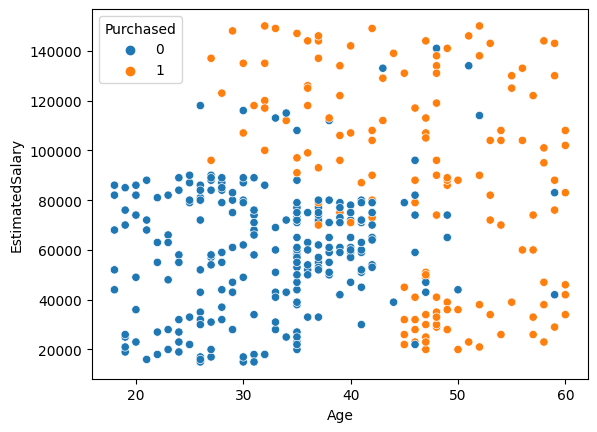

In [4]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=dataset)
plt.show()

In [5]:
X = dataset.iloc[:,:-1]
y = dataset['Purchased']

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Before

In [30]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
knc.score(X_test,y_test)*100

91.25

In [32]:
knc.score(X_train,y_train)*100

92.5

# After

In [22]:
for i in range(1,50):
    knc1 = KNeighborsClassifier(n_neighbors=i)
    knc1.fit(X_train,y_train)
    print("Testing: ",knc1.score(X_test,y_test)*100)
    print("Training: ",knc1.score(X_train,y_train)*100)
    print("K: ",i)
    print("-------------------------------------------")

Testing:  85.0
Training:  99.6875
K:  1
-------------------------------------------
Testing:  86.25
Training:  91.5625
K:  2
-------------------------------------------
Testing:  91.25
Training:  92.5
K:  3
-------------------------------------------
Testing:  92.5
Training:  91.875
K:  4
-------------------------------------------
Testing:  92.5
Training:  90.9375
K:  5
-------------------------------------------
Testing:  90.0
Training:  90.9375
K:  6
-------------------------------------------
Testing:  93.75
Training:  91.875
K:  7
-------------------------------------------
Testing:  92.5
Training:  90.625
K:  8
-------------------------------------------
Testing:  93.75
Training:  91.25
K:  9
-------------------------------------------
Testing:  92.5
Training:  90.625
K:  10
-------------------------------------------
Testing:  92.5
Training:  90.9375
K:  11
-------------------------------------------
Testing:  92.5
Training:  91.25
K:  12
----------------------------------------

# k = 6 and 3 

C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


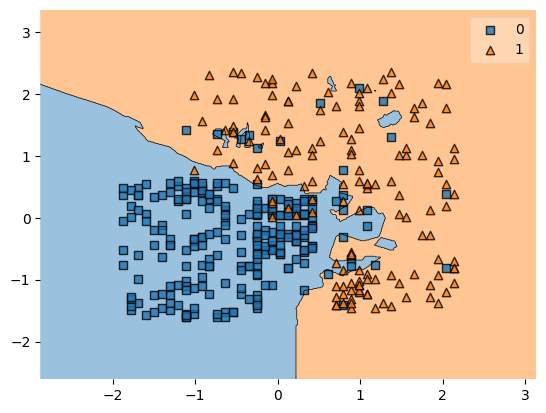

In [33]:
plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=knc)
plt.show()